In [35]:
from drought.data import aggregator
import drought.data.df_extensions as dfext
import spei as si
import matplotlib.pyplot as plt
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

### Obtain data needed to calculate SPEI - Precipitation and PET

In [36]:
# We have monthly data from 2001-2023 saved on a 50 km resolution
precip_df = pd.read_csv('../../data/interim/p_pet_2001-2023_scale_50km.csv', index_col=0)

In [61]:
monthly = pd.read_csv('../../data/interim/all_climate_monthly_mean_5000_scale_2001_to_2023.csv', index_col=0)

In [62]:
monthly['datetime'] = pd.to_datetime(monthly.datetime)

In [63]:
monthly = monthly.set_index('datetime')[['P-PET', 'polygon_id']]

## Calculate spei per polygon

In [105]:
def calculate_spei(df, periods=[1, 3, 6, 9, 12, 18]):
    speis = []
    for polygon_id in range(1, 9):
        polygon = df[df.polygon_id==polygon_id]
        for period in periods:
            polygon[f'spei_{period}'] = si.si.spei(polygon['P-PET'].sort_index().rolling(period).sum().dropna())
        speis.append(polygon)
    return pd.concat(speis)

In [107]:
spei_data = calculate_spei(monthly)

In [111]:
spei_data_long = spei_data.copy()
spei_data = spei_data[spei_data.index > '2019-04-01']

In [171]:
spei_data.to_csv('../../data/interim/2001-2023_spei_per_polygon.csv')

<AxesSubplot: >

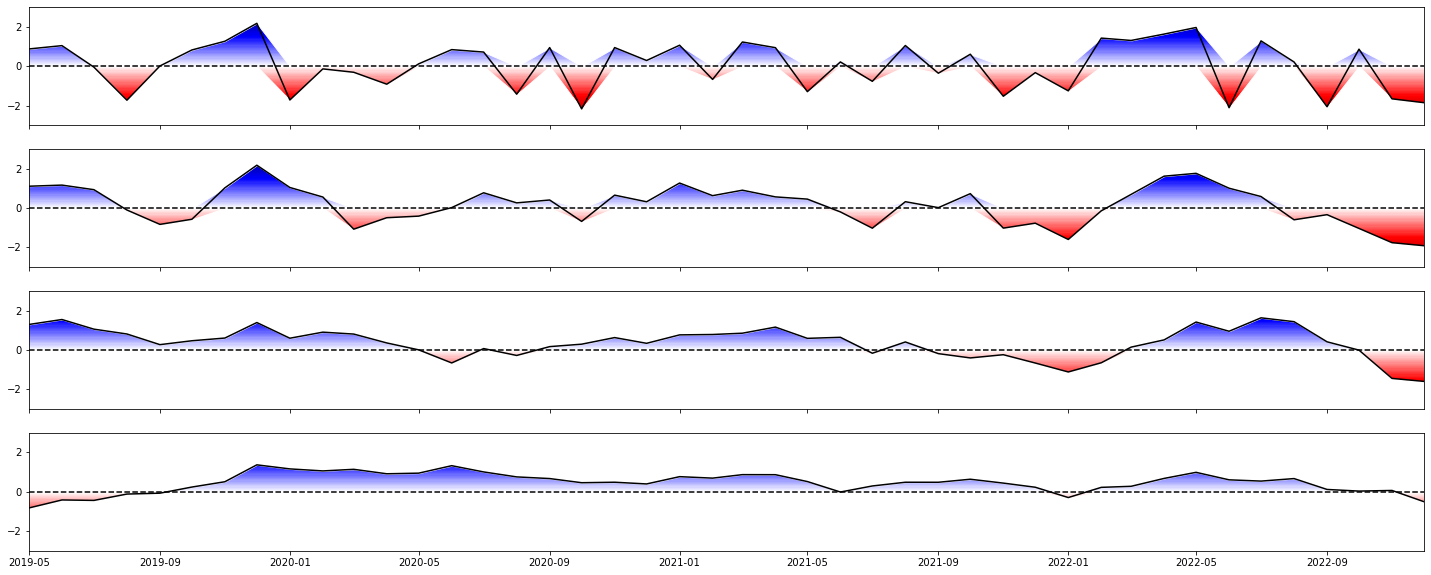

In [112]:
polygon_id = 1
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

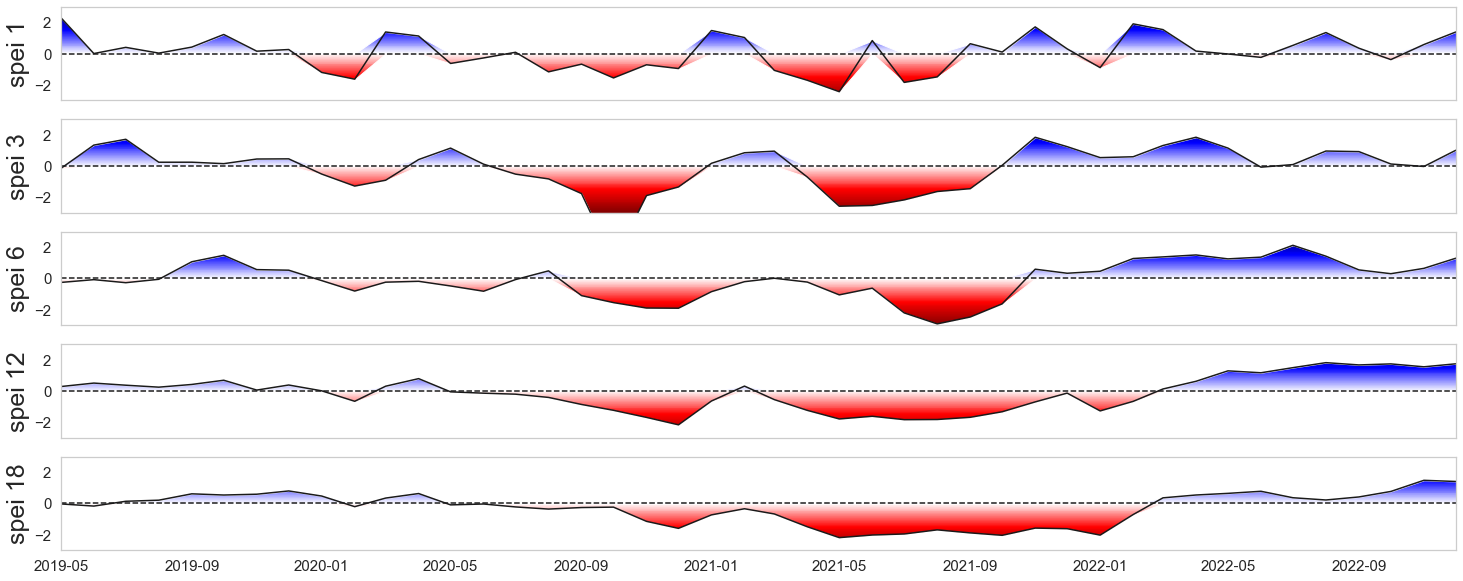

In [139]:
polygon_id = 2
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)
plt.savefig('../../reports/figures/final/polygon_2_spei.png')

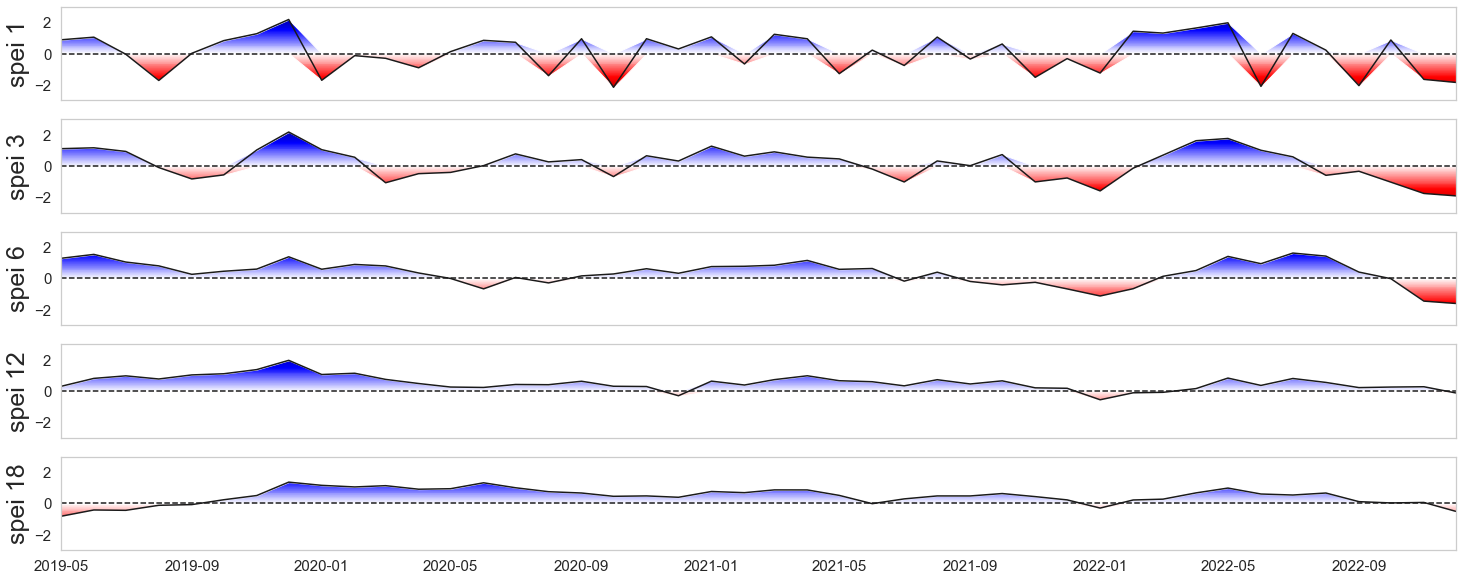

In [140]:
polygon_id = 1
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

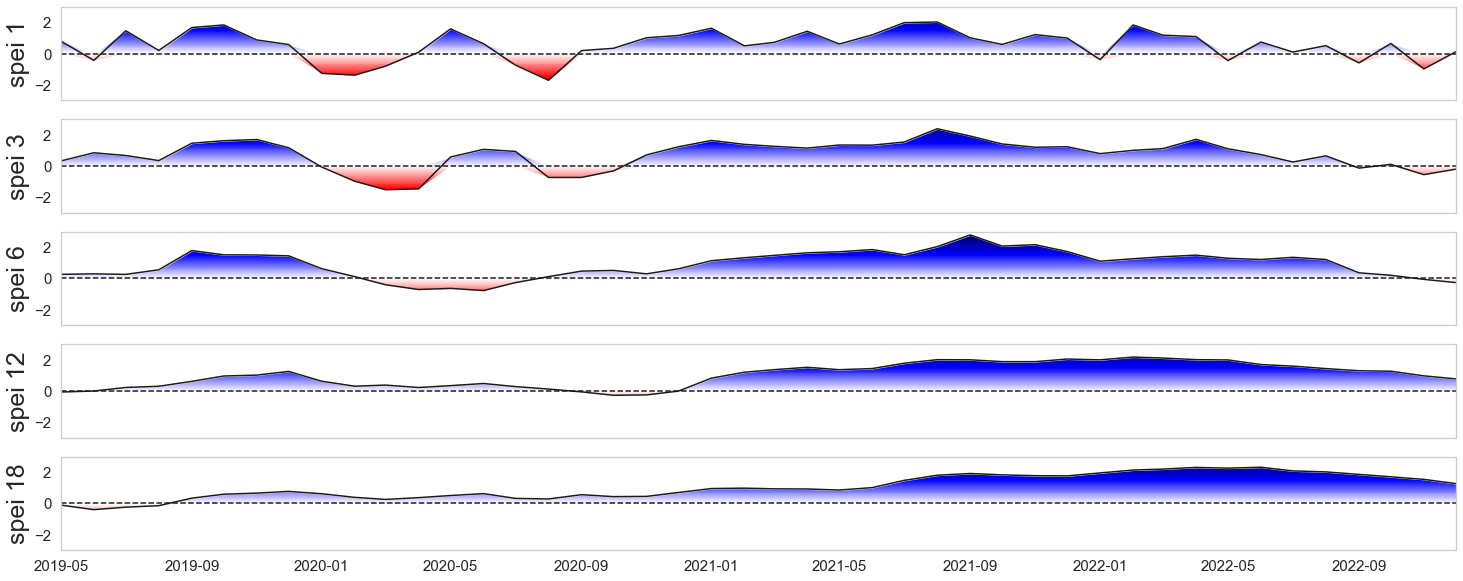

In [141]:
polygon_id = 3
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

/var/folders/2q/26zyw9sd5cldkn81_ymfw6dh0000gn/T/ipykernel_85249/2135227530.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  f.tight_layout(pad=15)


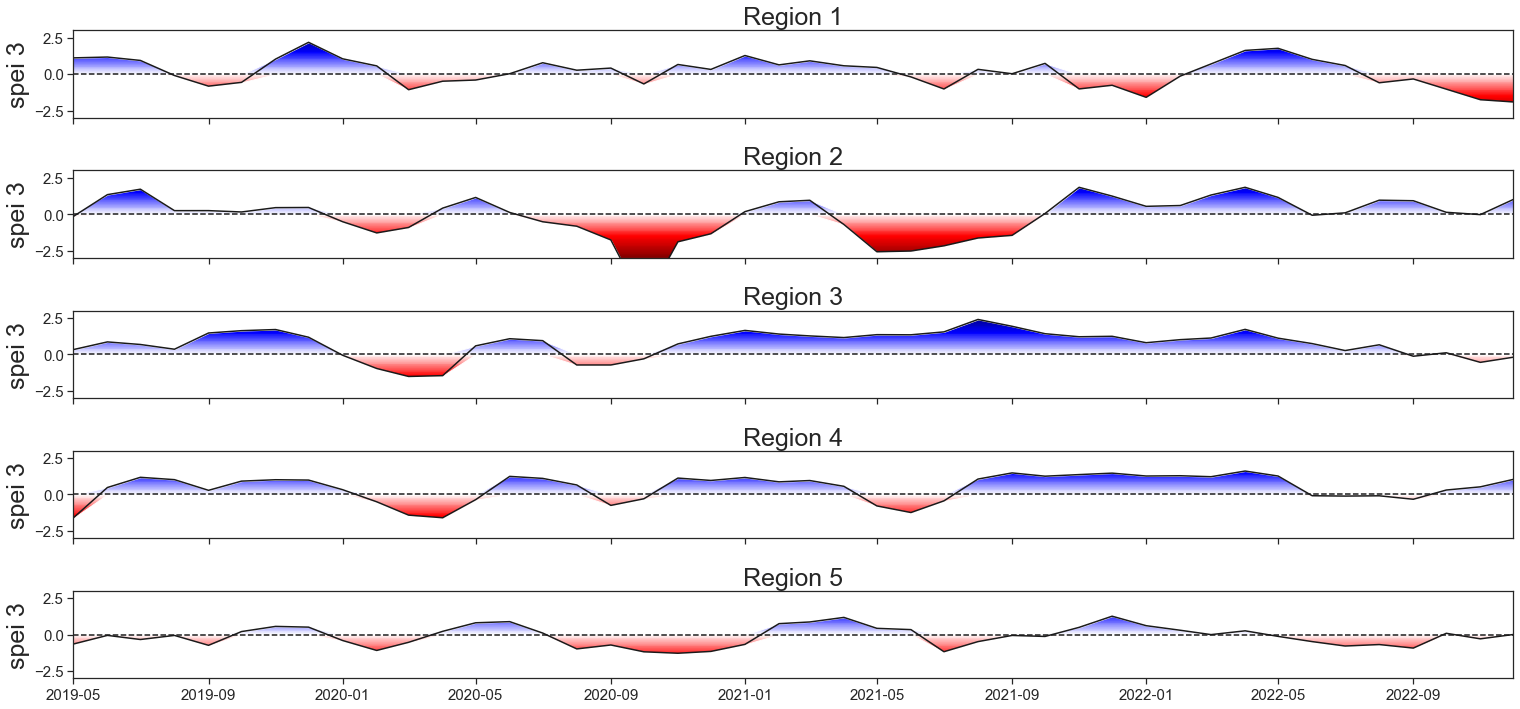

In [170]:
polygon_id = 5
import seaborn as sns
sns.set_theme(style="ticks")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==1]['spei_3'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 3', fontsize = 25)
ax[0].set_title('Region 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==2]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].set_title('Region 2', fontsize = 25)
si.plot.si(spei_data[spei_data.polygon_id==3]['spei_3'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 3', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[2].set_title('Region 3', fontsize = 25)
si.plot.si(spei_data[spei_data.polygon_id==4]['spei_3'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 3', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
ax[3].set_title('Region 4', fontsize = 25)
si.plot.si(spei_data[spei_data.polygon_id==5]['spei_3'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 3', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)
ax[4].set_title('Region 5', fontsize = 25)
f.tight_layout(pad=15)
plt.subplots_adjust(left=0.1,
                    bottom=0.3,
                    right=0.9,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.6)
plt.savefig('../../reports/figures/final/spei_3_per_polygon.png')

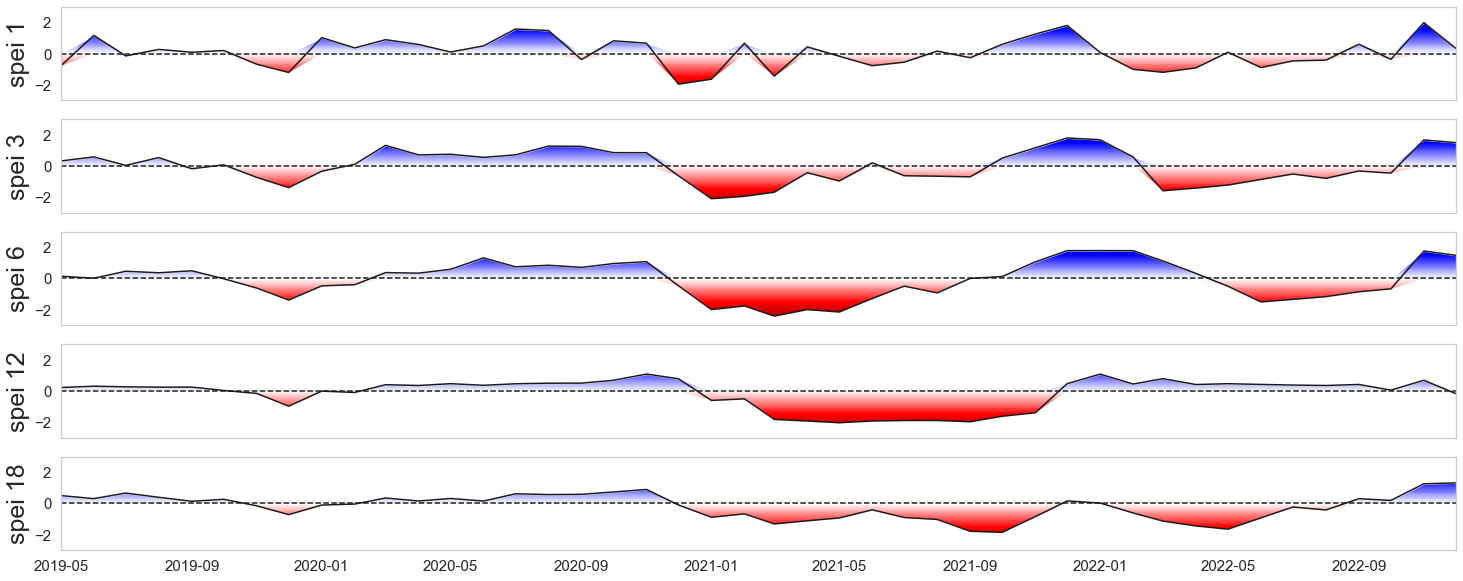

In [147]:
polygon_id = 7
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

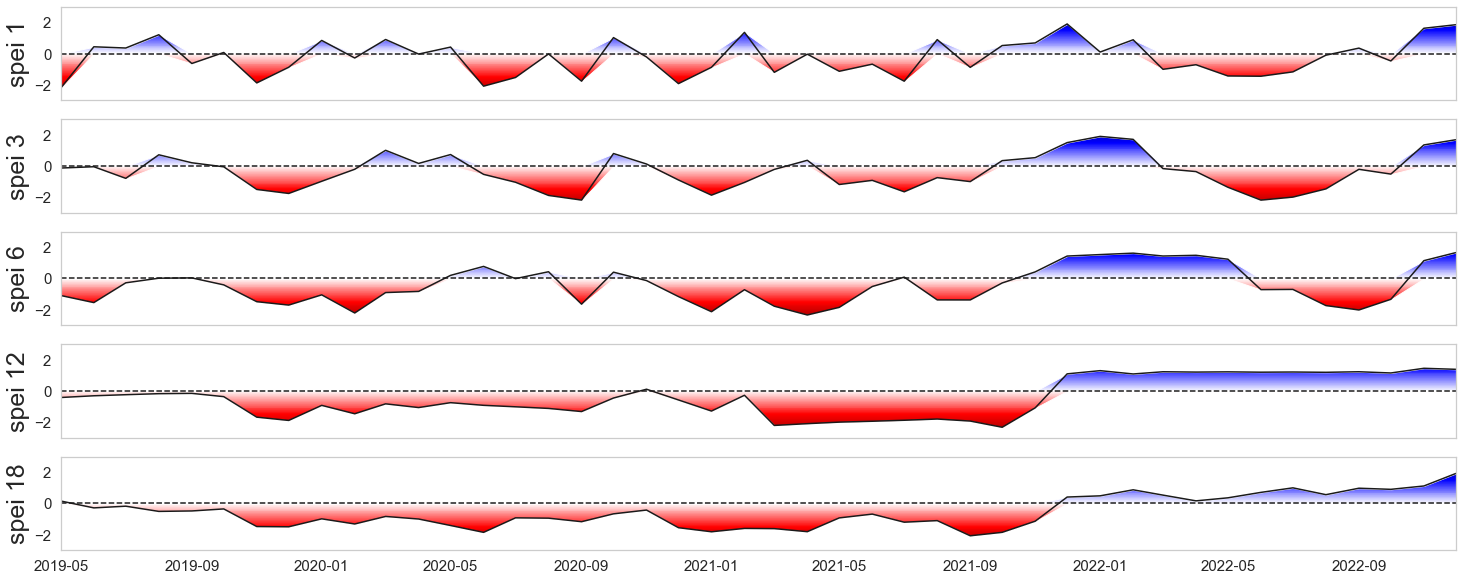

In [146]:
polygon_id = 8
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

<AxesSubplot: >

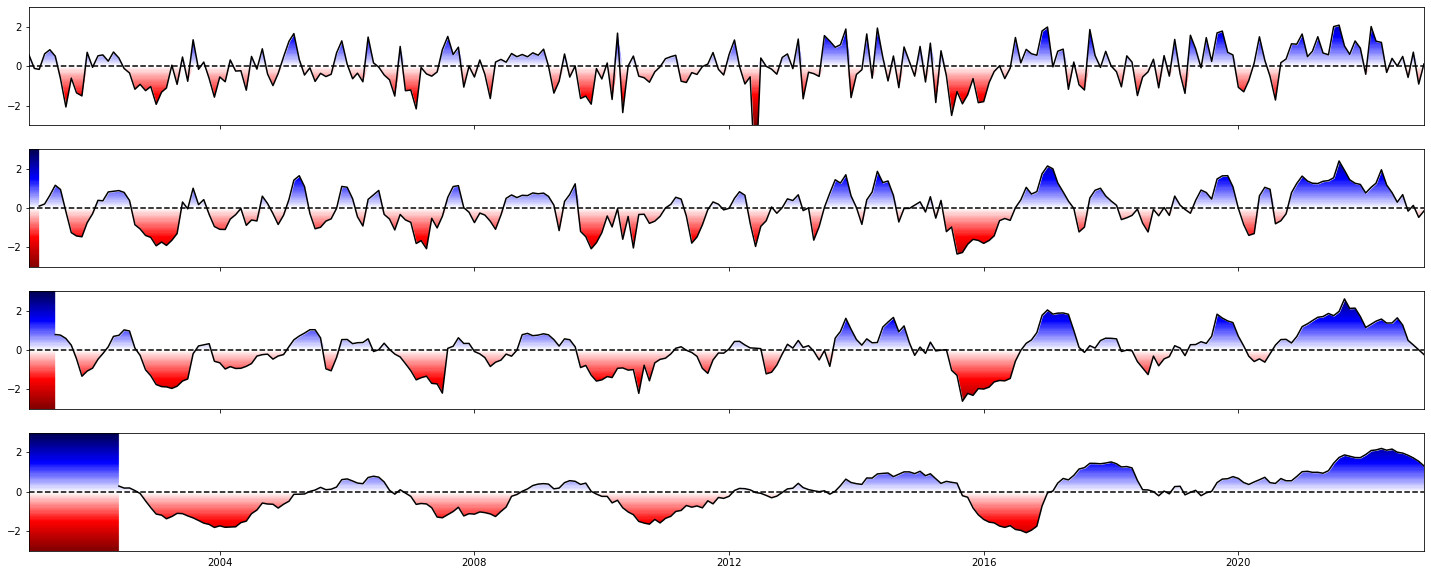

In [59]:
polygon_id = 3
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

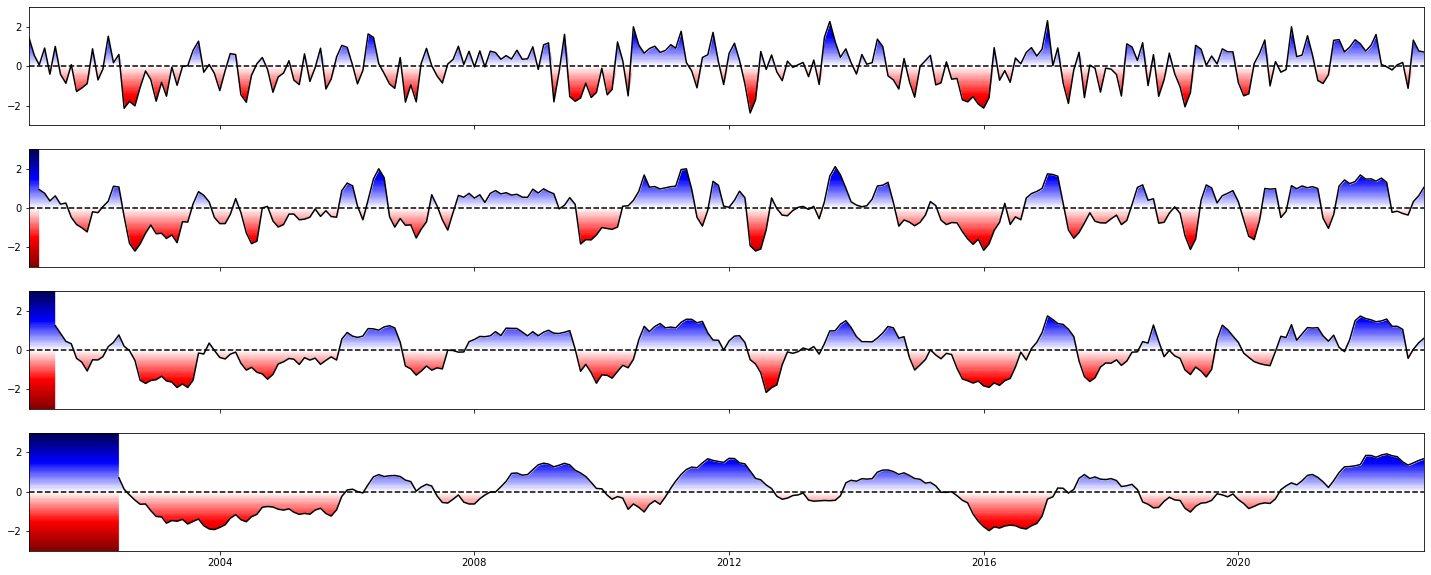

In [60]:
polygon_id = 4
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

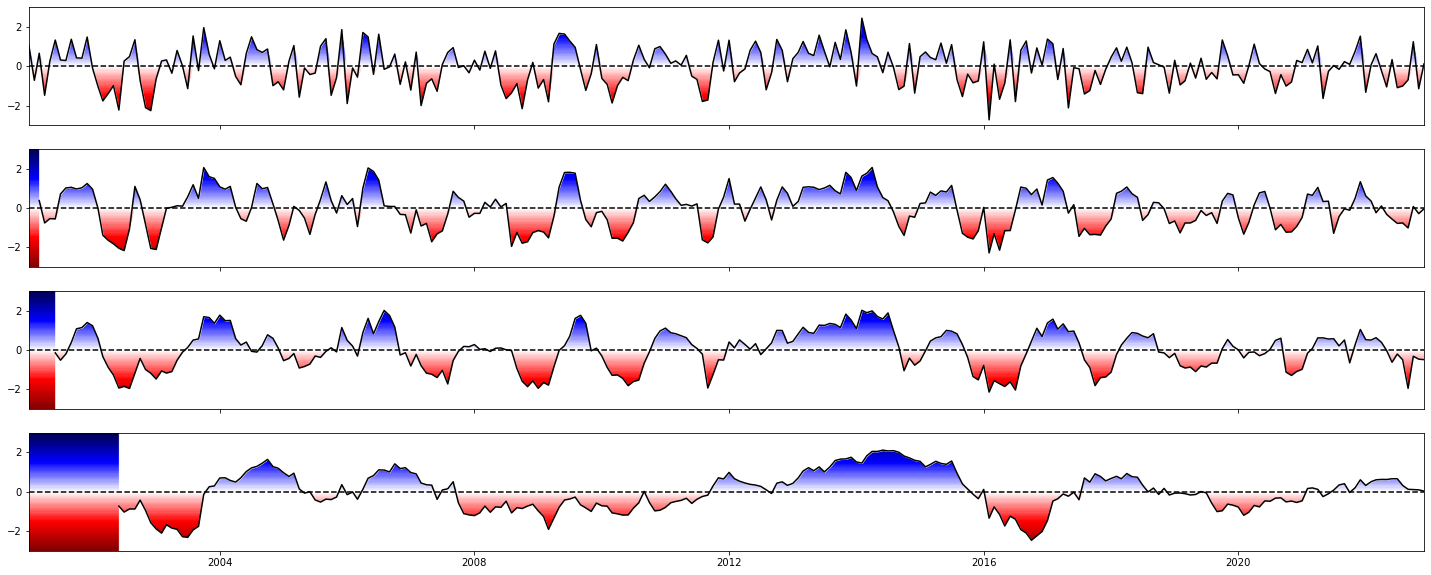

In [61]:
polygon_id = 5
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

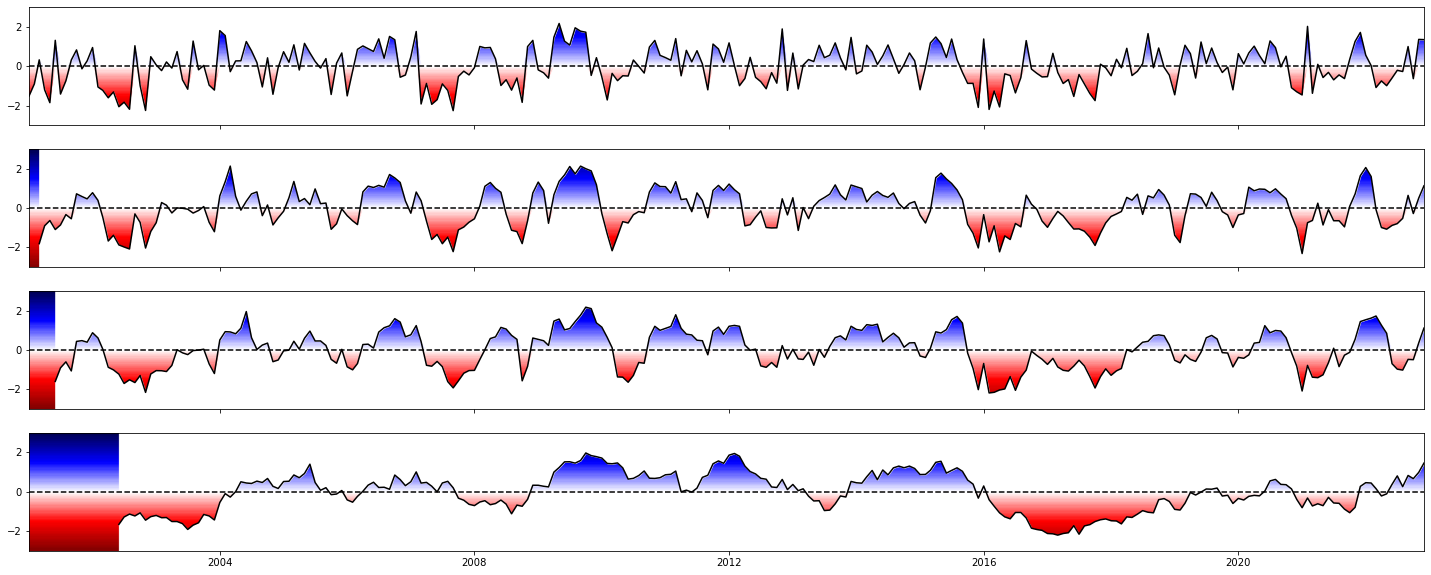

In [62]:
polygon_id = 6
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

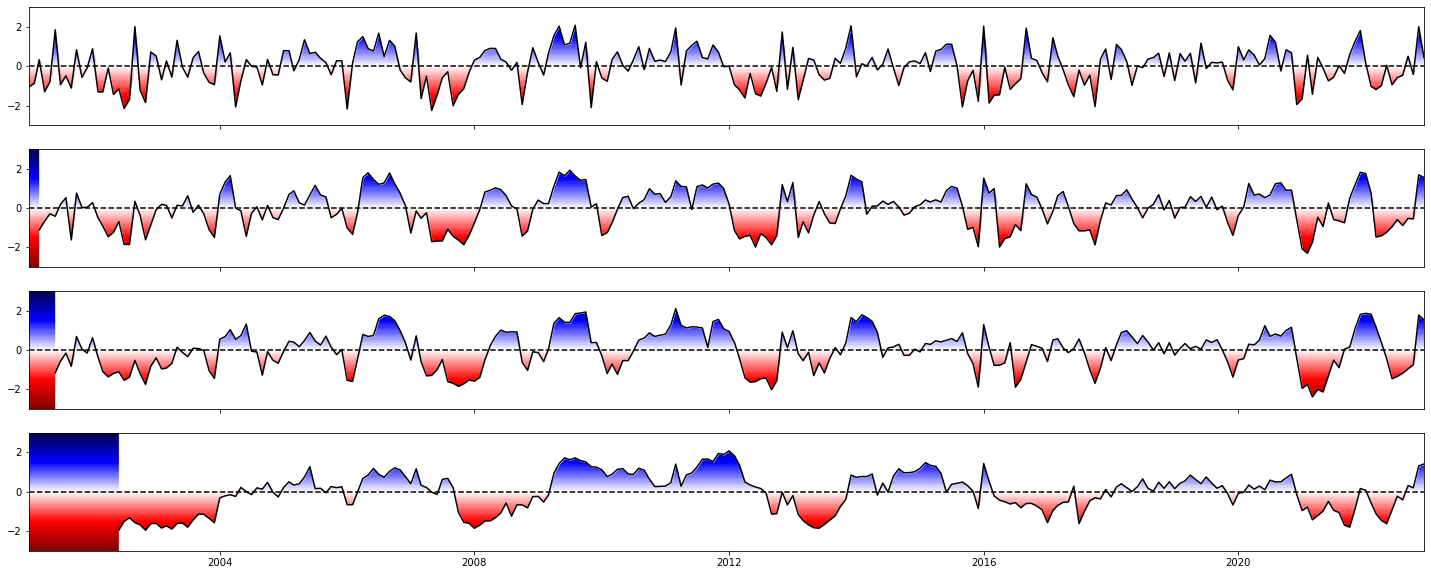

In [63]:
polygon_id = 7
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

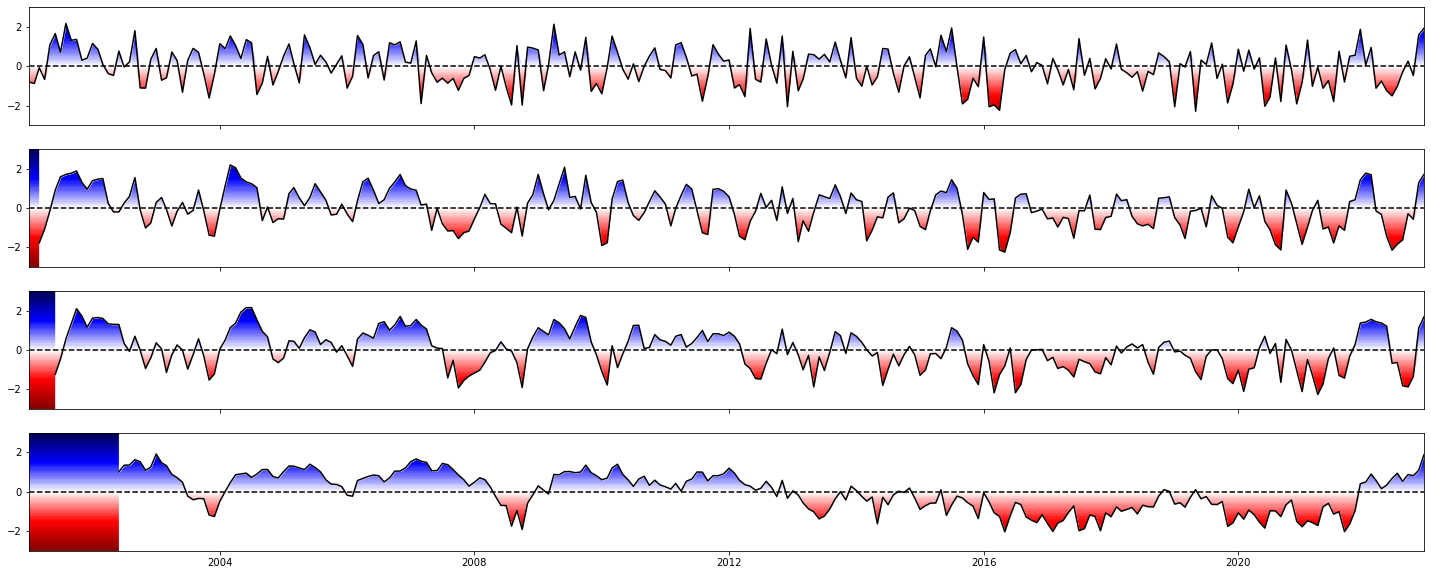

In [64]:
polygon_id = 8
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])